In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
import pandas as pd

In [35]:
housevalue = fch()
X = pd.DataFrame(housevalue.data) #放入DataFrame中便于查看
X.head
# housevalue

<bound method NDFrame.head of             0     1         2         3       4         5      6       7
0      8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1      8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2      7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3      5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4      3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25
...       ...   ...       ...       ...     ...       ...    ...     ...
20635  1.5603  25.0  5.045455  1.133333   845.0  2.560606  39.48 -121.09
20636  2.5568  18.0  6.114035  1.315789   356.0  3.122807  39.49 -121.21
20637  1.7000  17.0  5.205543  1.120092  1007.0  2.325635  39.43 -121.22
20638  1.8672  18.0  5.329513  1.171920   741.0  2.123209  39.43 -121.32
20639  2.3886  16.0  5.254717  1.162264  1387.0  2.616981  39.37 -121.24

[20640 rows x 8 columns]>

In [36]:
y = housevalue.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [37]:
X.shape

(20640, 8)

In [8]:
y.shape

(20640,)

In [9]:
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [11]:
X.columns = housevalue.feature_names

In [14]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in [Xtrain, Xtest]:
     i.index = range(i.shape[0])
Xtrain.shape

(14448, 8)

In [15]:
reg = LR().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

<function matplotlib.pyplot.show(*args, **kw)>

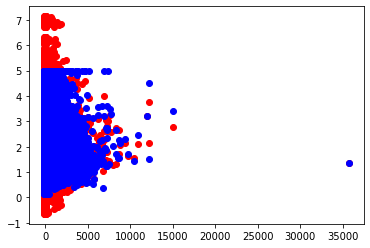

In [34]:
y_pre = reg.predict(X)#展示
plt.plot(Xtest,yhat,'ro')
plt.plot(Xtest,Ytest,'bo')
plt.show

In [16]:
reg.coef_
[*zip(Xtrain.columns,reg.coef_)]

[('MedInc', 0.43735893059684033),
 ('HouseAge', 0.010211268294494024),
 ('AveRooms', -0.10780721617317683),
 ('AveBedrms', 0.6264338275363768),
 ('Population', 5.216125353123053e-07),
 ('AveOccup', -0.003348509646333473),
 ('Latitude', -0.41309593789477156),
 ('Longitude', -0.4262109536208467)]

In [17]:
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat,Ytest)
y.max()
y.min()
cross_val_score(reg,X,y,cv=10,scoring="neg_mean_squared_error")

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [18]:
from sklearn.metrics import r2_score
r2_score(yhat,Ytest)
r2 = reg.score(Xtest,Ytest)
r2

0.6043668160178818

In [39]:
reg_coef = reg.coef_ 
reg_coef

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [40]:
reg_intercept = reg.intercept_
reg_intercept

-36.25689322920383

In [19]:
r2_score(y_true = Ytest,y_pred = yhat)
cross_val_score(reg,X,y,cv=10,scoring="r2").mean()

0.511006861052455

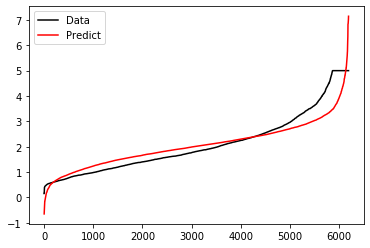

In [20]:
import matplotlib.pyplot as plt
sorted(Ytest)
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()


In [31]:
prediction = LR.predict(pd.DataFrame(3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25))
print(prediction)

AttributeError: type object 'DataFrame' has no attribute 'toarray'